In [1]:
from sklearn.datasets import load_linnerud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
linnerud=load_linnerud()

In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
linnerud.target_names

['Weight', 'Waist', 'Pulse']

In [5]:
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
df_target=pd.DataFrame(linnerud.target, columns=linnerud.target_names)
data=pd.concat([df, df_target], axis=1)

In [6]:
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [7]:
data.drop(columns=['Weight', 'Pulse'], inplace=True)

In [8]:
data.head()

,Chins,Situps,Jumps,Waist
0,5.0,162.0,60.0,36.0
1,2.0,110.0,60.0,37.0
2,12.0,101.0,101.0,38.0
3,12.0,105.0,37.0,35.0
4,13.0,155.0,58.0,35.0


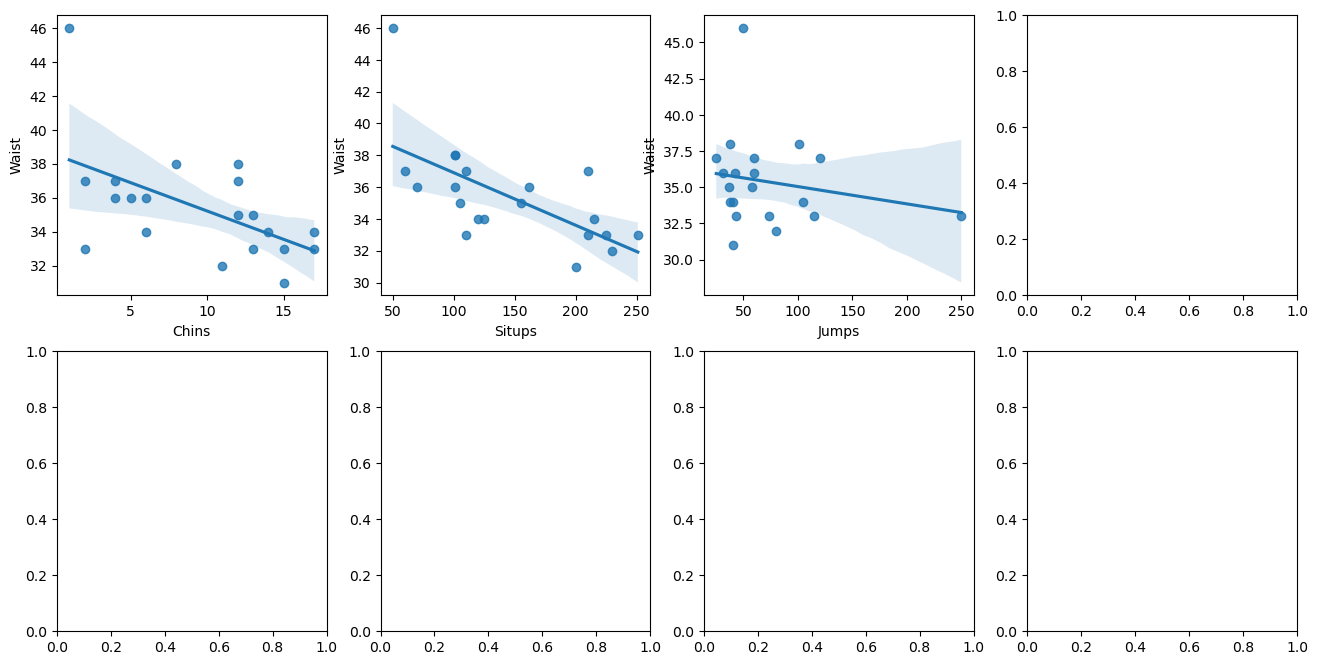

In [9]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

li_features = ['Chins', 'Situps', 'Jumps']

for i, feature in enumerate(li_features):
    row = int(i/3)
    col = i%3
    
    sns.regplot(x=feature, y='Waist', data=data, ax=axs[row][col])

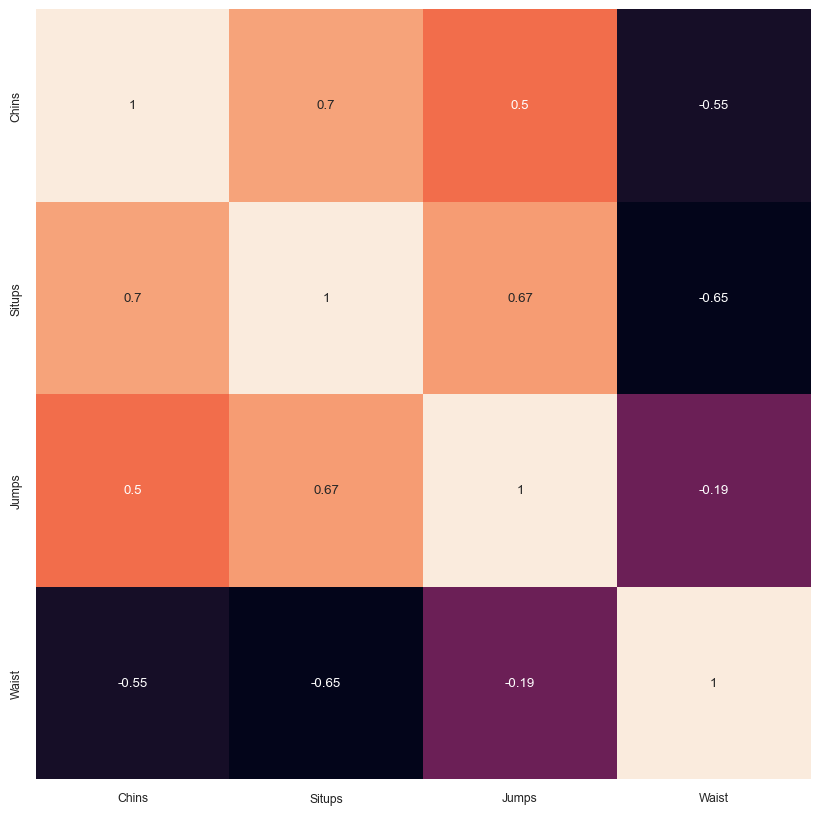

In [13]:
df_corr=data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X=data.loc[:, ['Chins', 'Situps', 'Jumps']]
y=data.loc[:, 'Waist']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True,
                                                   random_state=30)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16,)
(4, 3) (4,)


In [16]:
X_train.head()

,Chins,Situps,Jumps
9,17.0,251.0,250.0
6,8.0,101.0,38.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
16,4.0,60.0,25.0


In [17]:
y_train.head()

9     33.0
6     38.0
10    34.0
8     31.0
16    37.0
Name: Waist, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(X_train)
train_scaled= ss.transform(X_train)
test_scaled= ss.transform(X_test)

In [19]:
from sklearn.svm import SVR

clf_svr = SVR()
clf_svr.fit(X_train, y_train)

pred_svr = clf_svr.predict(X_test)

print(clf_svr.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(pred_svr, y_test))
print('평균제곱근오차', mse)

0.37766464937949185
평균제곱근오차 1.9023852172766047


In [20]:
from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(pred_svr, y_test))
print('평균제곱근오차', mse)

1.0
평균제곱근오차 1.9023852172766047


In [21]:
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(random_state=30)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

print(clf_rf.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(pred_svr, y_test))
print('평균제곱근오차', mse)

0.897156931359354
평균제곱근오차 1.9023852172766047


In [22]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=30)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(pred_svr, y_test))
print('평균제곱근오차', mse)

0.4375
평균제곱근오차 1.9023852172766047


C:\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

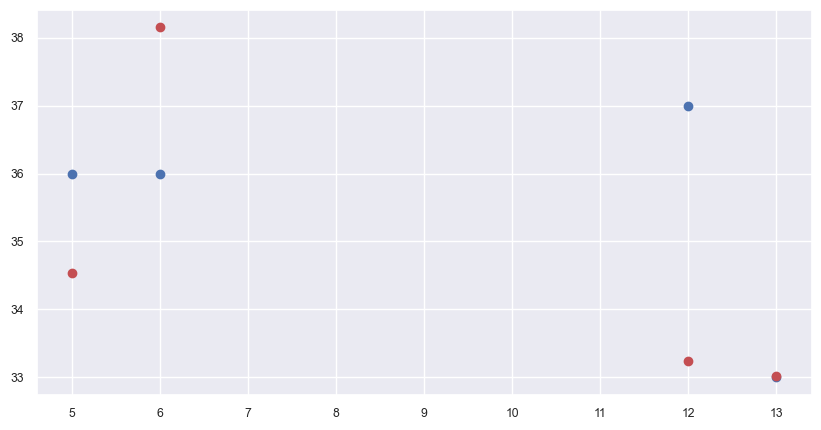

In [27]:
y_test_pred=lr.predict(X_test)  #예측값 저장

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')

plt.show()

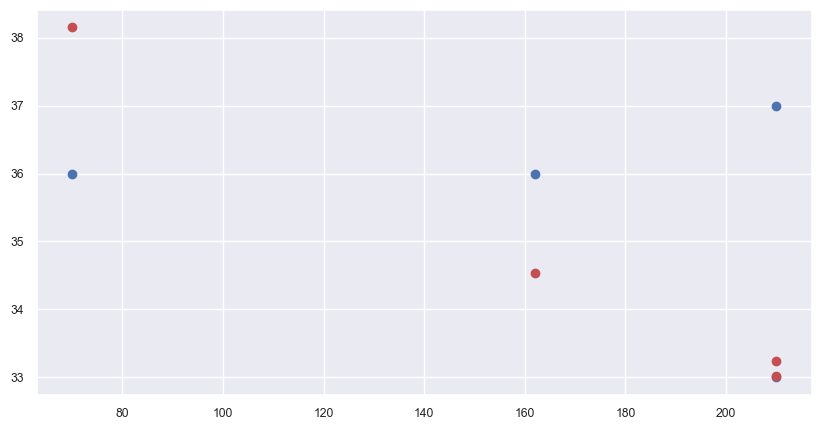

In [28]:
y_test_pred=lr.predict(X_test)  #예측값 저장

plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')

plt.show()

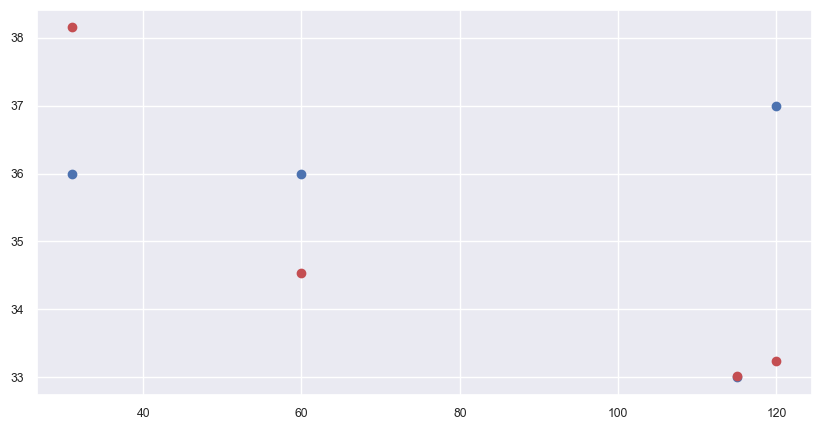

In [29]:
y_test_pred=lr.predict(X_test)  #예측값 저장

plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_test_pred, c='r', label='y_pred')

plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
print(train_poly.shape)

(16, 55)


In [31]:
poly.get_feature_names_out()

array(['Chins', 'Situps', 'Jumps', 'Chins^2', 'Chins Situps',
       'Chins Jumps', 'Situps^2', 'Situps Jumps', 'Jumps^2', 'Chins^3',
       'Chins^2 Situps', 'Chins^2 Jumps', 'Chins Situps^2',
       'Chins Situps Jumps', 'Chins Jumps^2', 'Situps^3',
       'Situps^2 Jumps', 'Situps Jumps^2', 'Jumps^3', 'Chins^4',
       'Chins^3 Situps', 'Chins^3 Jumps', 'Chins^2 Situps^2',
       'Chins^2 Situps Jumps', 'Chins^2 Jumps^2', 'Chins Situps^3',
       'Chins Situps^2 Jumps', 'Chins Situps Jumps^2', 'Chins Jumps^3',
       'Situps^4', 'Situps^3 Jumps', 'Situps^2 Jumps^2', 'Situps Jumps^3',
       'Jumps^4', 'Chins^5', 'Chins^4 Situps', 'Chins^4 Jumps',
       'Chins^3 Situps^2', 'Chins^3 Situps Jumps', 'Chins^3 Jumps^2',
       'Chins^2 Situps^3', 'Chins^2 Situps^2 Jumps',
       'Chins^2 Situps Jumps^2', 'Chins^2 Jumps^3', 'Chins Situps^4',
       'Chins Situps^3 Jumps', 'Chins Situps^2 Jumps^2',
       'Chins Situps Jumps^3', 'Chins Jumps^4', 'Situps^5',
       'Situps^4 Jumps', 'Situps

In [32]:
test_poly=poly.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))

1.0


In [34]:
print(lr.score(test_poly, y_test))

-1555.6099801660803


In [36]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [37]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.7252246236137178


In [38]:
print(ridge.score(test_scaled, y_test))

-1.395628290595754


In [39]:
#적절한 alpha 값 찾기
train_score=[]
test_score=[]

alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    
    ridge.fit(train_scaled, y_train)
    
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

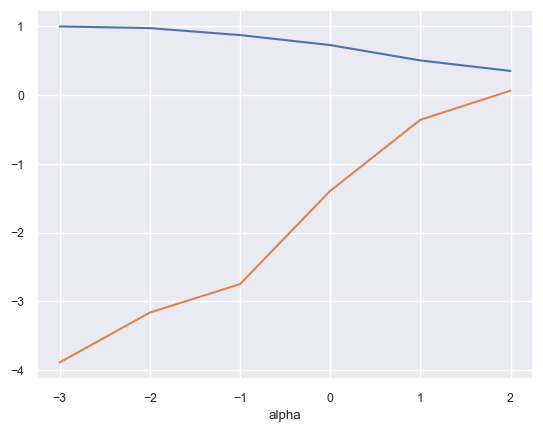

In [40]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.show()

In [41]:
#적절한 alpha 값은 100
ridge=Ridge(alpha=100)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.3489957223404089
0.06253029190138948


In [43]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.4205542468020451
-0.4808173127663855


In [44]:
#적절한 alpha 값 찾기
train_score=[]
test_score=[]

alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha, max_iter=10000)
    
    lasso.fit(train_scaled, y_train)
    
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

C:\anaconda_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+00, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(


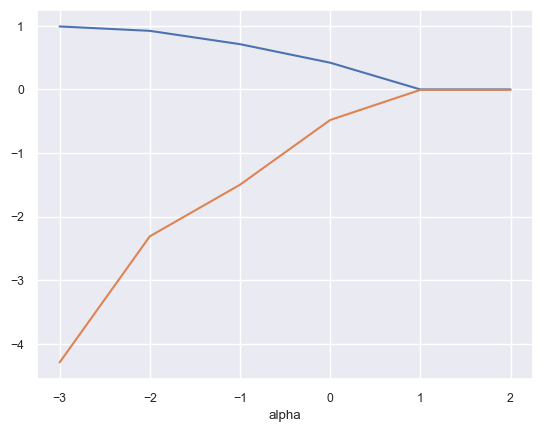

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.show()

In [49]:
#적절한 alpha 값은 10
lasso=Lasso(alpha=10)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.00694444444444442
